In [57]:
# Sources:https://www.datacamp.com/community/tutorials/introduction-machine-learning-python
# I'm using datacamp examples to help me analysis the iris data.

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_iris

In [58]:
iris = load_iris()
data = load_iris().data
# Extract the class labels/features
labels = load_iris().target


In [59]:
#Since data is 2d array then we need to make labels into a 2d array as well. 
labels = np.reshape(labels,(150,1))
data = np.concatenate([data,labels],axis=-1)
# Assign column names to the dataset
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']
dataset = pd.DataFrame(data,columns=data_names)

#converting the labels from strings to integers to make it easier
# 0  = Setosa , 1 = Veriscolor, and 2 = virginica
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

In [60]:
#iris data set information 
#Checking if there's any missing values in iris data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [61]:
#iris data basic statistical summary 
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
# 50 samples per class 
# ~33.3% of the total distribution
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

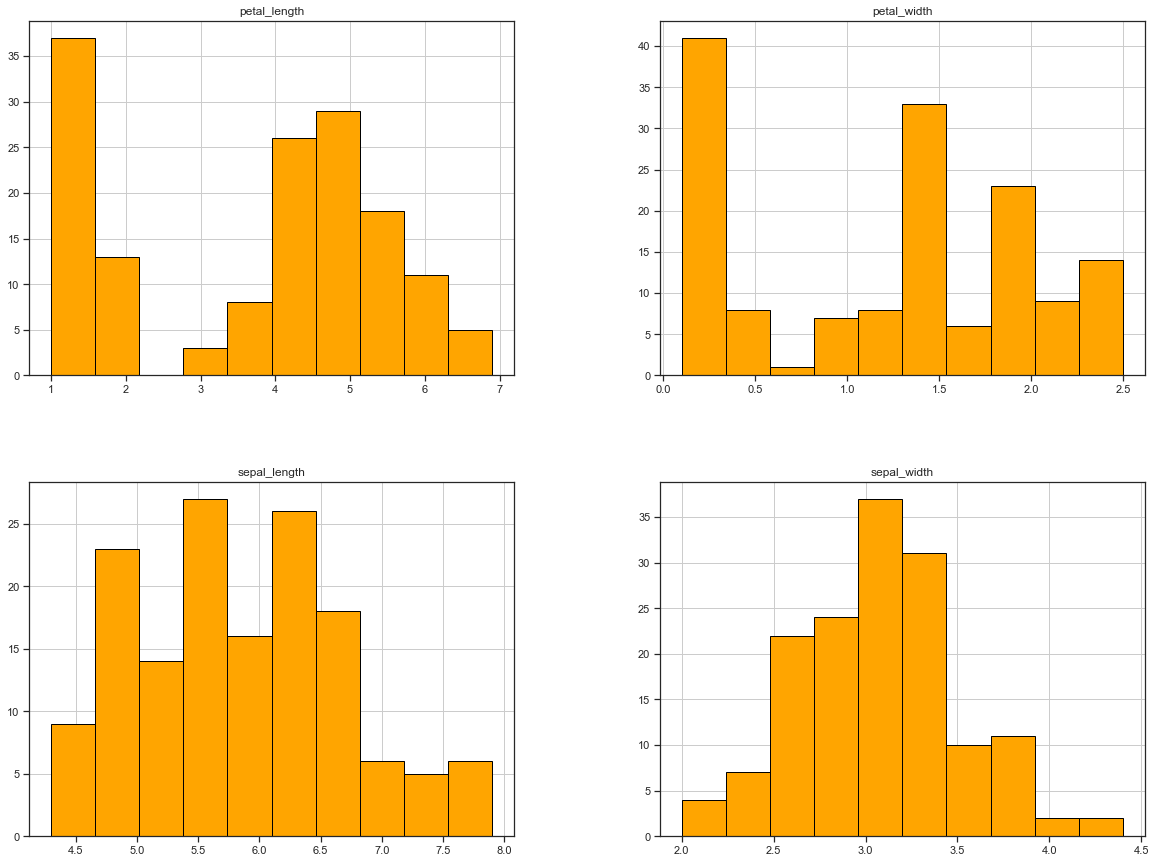

In [63]:
#Iris Historgram of the four features
dataset.hist(figsize = (20, 15),edgecolor = 'black',color = 'orange')
plt.show()

C:\Users\campo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


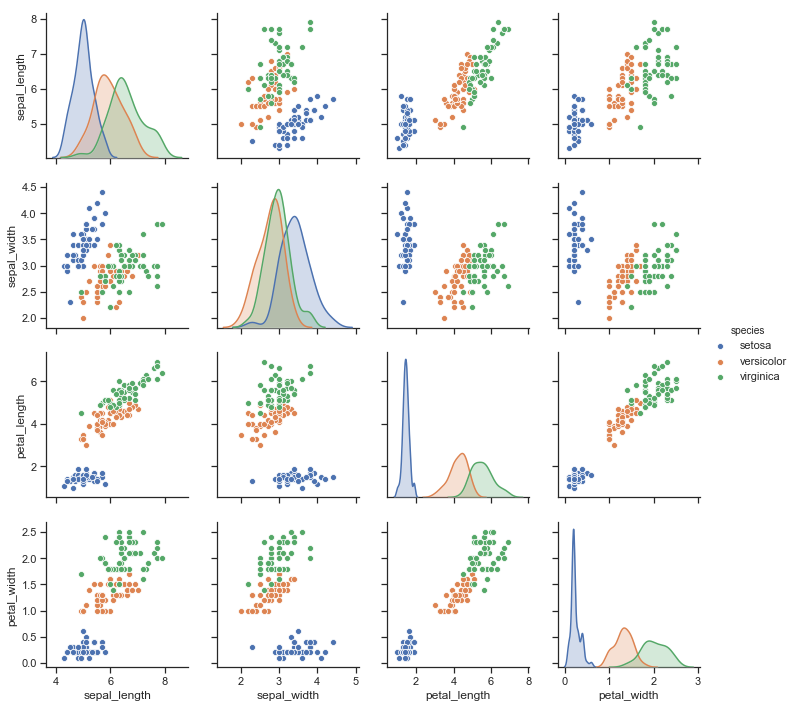

In [64]:
#The pairplot of the iris features.
sb.set(style="ticks", color_codes=True)
iris = sb.load_dataset("iris")
graph = sb.pairplot(iris,hue="species")

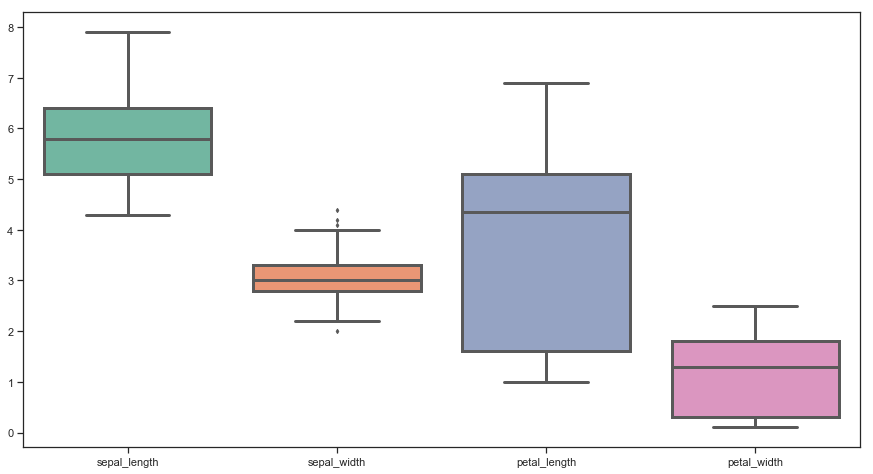

In [65]:
#boxplot of the iris features
# We could see a few outliers in the box plot 
plt.figure(figsize=(15,8))
axes = sb.boxplot(data=iris,orient="v", palette="Set2",linewidth=3,fliersize=3)

[]

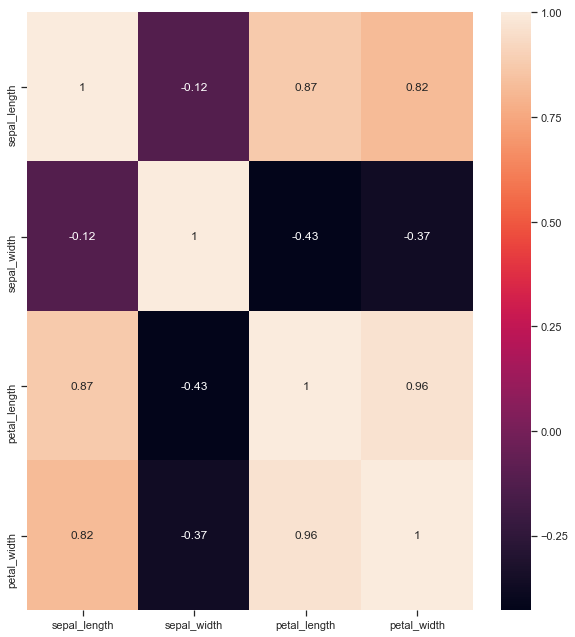

In [66]:
# Exploring the correlation of features in iris dataset
plt.figure(figsize=(10,11))
sb.heatmap(dataset.corr(),annot=True)
plt.plot()

In [67]:
# Training data is 80%
# Testing data is 20% 
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3],dataset.iloc[:,4], test_size=0.2, random_state=42)

#Check the shape of the data
#train_data.shape,train_label.shape,test_data.shape,test_label.shape


In [68]:
# Using the k nearest neighbor Algorithm 
neighbors = np.arange(1,10)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

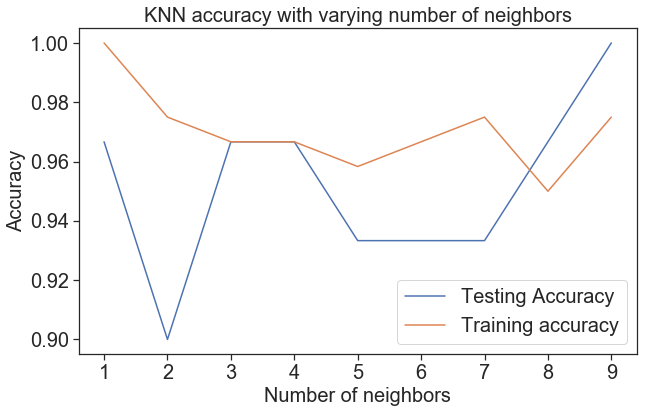

In [69]:
# Finding the best k value at which my model performs the best.

plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [70]:
# We pick k value to be 3 because the model performs best with k = 3 

knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

In [71]:
test_accuracy

0.9666666666666667

In [72]:
prediction = knn.predict(test_data)

In [73]:
#Classificiation report of iris data

print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\campo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


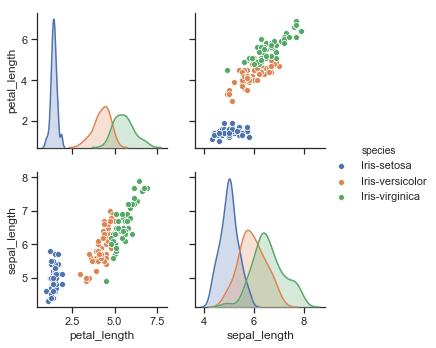

In [74]:
sb.pairplot(dataset[['petal_length','sepal_length','species']], hue = 'species')

In [187]:
# We observe that sepal length and petal width for Iris-versicolor and Iris-virginica are reasonably correlated, 
# so we are going to take those two variables for those two classes and use Linear regression
#newX = data[0:,:3] 
#tmp = data[0:,:1] 
#tmp2 = data[0:,2:3]

#newY = labels 

In [188]:
#tmp
#newX
#tmp2
#newX

In [189]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
